# Data Exploration on our dataset

### Let's open our CSV file containing our list of books and meta data

In [12]:
# imports and setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
import os 


### read the CSV file and store it in a df

In [13]:
# read csv file and store to dataframe
abs_path = "/Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/csv/books.csv"

books_df = pd.read_csv(abs_path, sep=',', encoding='utf-8', names=['id', 'title', 'authors', 'subjects', 'languages', 'formats', 'download_count'])
books_df

,id,title,authors,subjects,languages,formats,download_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883
...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0


### let's enrich the dataset with word count and character count

In [14]:
abs_path_books = "/Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/" 

def count_words(id):
    ''' Count words in the book '''
    # first check if file exists
    if not os.path.isfile(f'{abs_path_books}{id}.txt'):
        return None
    # if it exists, count words
    with open(f'{abs_path_books}{id}.txt', 'r') as file:
        text = file.read()
        words = text.split()
        return len(words)

# store word count in a new column
books_df['word_count'] = books_df['id'].apply(count_words)

In [ ]:
books_df

,id,title,authors,subjects,languages,formats,download_count,word_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN
...,...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0,25013.0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0,45708.0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0,10794.0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0,4054.0


In [ ]:
abs_path_books = "/Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/" 

def count_chars(id):
    ''' Count chars in the book '''
    # first check if file exists
    if not os.path.isfile(f'{abs_path_books}{id}.txt'):
        return None
    # if it exists, count chars
    with open(f'{abs_path_books}{id}.txt', 'r') as file:
        text = file.read()
        chars = list(text)
        return len(chars)

# store char count in a new column
books_df['char_count'] = books_df['id'].apply(count_chars)

In [ ]:
books_df

,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0,25013.0,141001.0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0,45708.0,254733.0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0,10794.0,61164.0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0,4054.0,24858.0


# Let's explore our dataset

In [ ]:
# Check out the distribution of the number of books per language
books_df['languages'].value_counts()

languages
en     37638
de        23
brx        2
cy         2
ceb        1
el         1
ale        1
Name: count, dtype: int64

In [ ]:
# Check out the distribution of the number of books per author
books_df['authors'].value_counts()

authors
Various                              2754
Anonymous                             542
Lytton Edward Bulwer Lytton Baron     203
Shakespeare William                   166
Ebers Georg                           146
                                     ... 
Cutten George Barton                    1
Prus Bolesław                           1
Donovan Francis                         1
Wilkie Katharine Elliott                1
Mason Eveleen Laura                     1
Name: count, Length: 13434, dtype: int64

In [ ]:
# Check out the average number of words per author
books_df.groupby('authors')['word_count'].mean().sort_values(ascending=False)

authors
Fishburne William Brett           1.696304e+06
Brown Goold                       1.002977e+06
Larned J. N. (Josephus Nelson)    8.768262e+05
Project Gutenberg                 8.176822e+05
Nuttall P. Austin                 7.968890e+05
                                      ...     
Kahle Brewster                             NaN
Lister Joseph Baron                        NaN
Marvell Andrew                             NaN
McGuinn Roger                              NaN
National Promenade Band                    NaN
Name: word_count, Length: 13434, dtype: float64

In [ ]:
# Check out the average number of chars per author
books_df.groupby('authors')['char_count'].mean().sort_values(ascending=False)

authors
Fishburne William Brett           9135204.0
Brown Goold                       6266593.0
Project Gutenberg                 6229422.5
Larned J. N. (Josephus Nelson)    5596306.0
Lemprière John                    4913900.0
                                    ...    
Kahle Brewster                          NaN
Lister Joseph Baron                     NaN
Marvell Andrew                          NaN
McGuinn Roger                           NaN
National Promenade Band                 NaN
Name: char_count, Length: 13434, dtype: float64

In [ ]:
# check out the books from the author 'United States. Central Intelligence Agency'
books_df[books_df['authors'] == 'United States. Central Intelligence Agency']

,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
779,35830,The 2010 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/35830/35830-re...,607,NaN,NaN
1875,14,The 1990 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/14.txt.utf-8,243,266133.0,1916588.0
2623,27638,The 2001 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27638/27638-RE...,174,NaN,NaN
2645,3672,The 2000 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/3672.txt.utf-8,172,495815.0,3397569.0
3213,6344,The 2002 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/6344.txt.utf-8,141,530425.0,3759698.0
3508,27348,The 2007 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27348/27348-RE...,130,NaN,NaN
3642,25,The 1991 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/25.txt.utf-8,125,289088.0,2160119.0
3685,27558,The 2003 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/files/27558/27558-RE...,124,NaN,NaN
4203,35829,The 2009 CIA World Factbook,United States. Central Intelligence Agency,Political science -- Handbooks manuals etc. Po...,en,https://www.gutenberg.org/files/35829/35829-re...,109,NaN,NaN
4496,48,The 1992 CIA World Factbook,United States. Central Intelligence Agency,Geography -- Handbooks manuals etc. Political ...,en,https://www.gutenberg.org/ebooks/48.txt.utf-8,102,327638.0,2416909.0


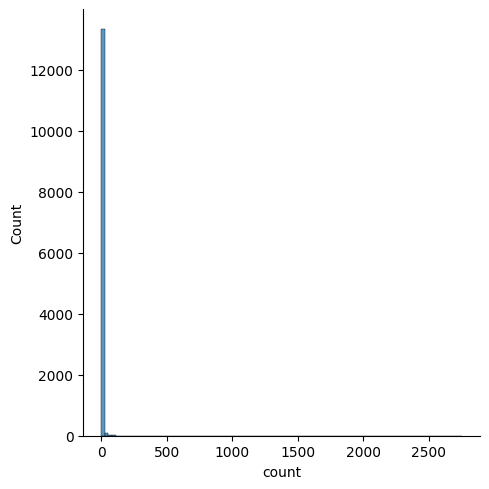

In [ ]:
# let's plot the distribution of the number of books per author
sns.displot(books_df['authors'].value_counts(), bins=100)

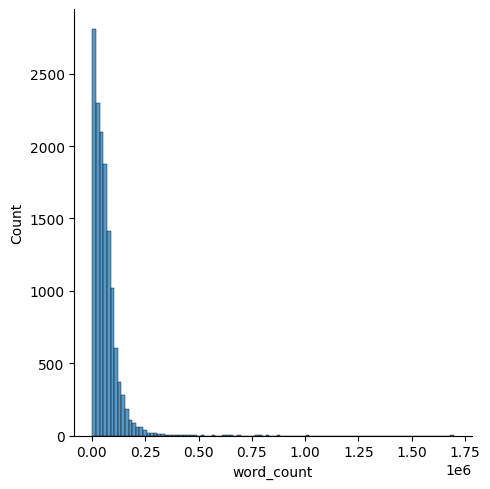

In [ ]:
# let's plot the distribution of the number of words per author
sns.displot(books_df.groupby('authors')['word_count'].mean(), bins=100)

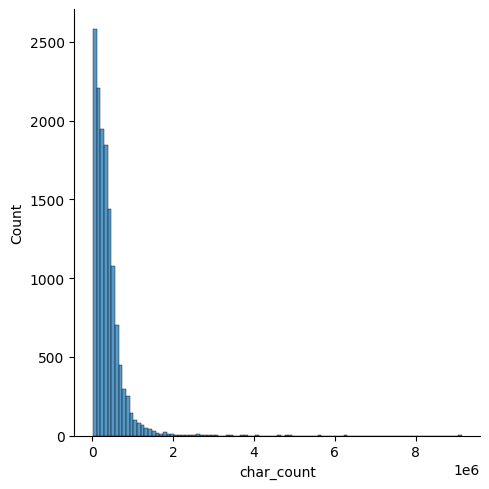

In [ ]:
# let's plot the distribution of the number of chars per author
sns.displot(books_df.groupby('authors')['char_count'].mean(), bins=100)

In [ ]:
# display the books which have been downloaded the most
books_df.sort_values(by='download_count', ascending=False)


,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37660,5370,Richard Carvel — Volume 06,Churchill Winston,Maryland -- History -- Fiction United States -...,en,https://www.gutenberg.org/ebooks/5370.txt.utf-8,0,25936.0,143758.0
37659,5358,The Inside of the Cup — Volume 03,Churchill Winston,Attitude change -- Fiction Christian ethics --...,en,https://www.gutenberg.org/ebooks/5358.txt.utf-8,0,25892.0,146943.0
37658,4441,Vittoria — Volume 7,Meredith George,Historical fiction Italy -- History -- Revolut...,en,https://www.gutenberg.org/ebooks/4441.txt.utf-8,0,30669.0,175560.0
37656,3979,Fromont and Risler — Volume 4,Daudet Alphonse,French fiction -- Translations into English Pa...,en,https://www.gutenberg.org/ebooks/3979.txt.utf-8,0,19830.0,115319.0


In [ ]:
# get a list of authors with more than 1 book in the dataset
authors = books_df['authors'].value_counts()
authors = authors[authors > 1]
authors = authors.index.tolist()

books_df = books_df[books_df['authors'].isin(authors)]
books_df 

,id,title,authors,subjects,languages,formats,download_count,word_count,char_count
0,16389,The Enchanted April,Von Arnim Elizabeth,British -- Italy -- Fiction Domestic fiction F...,en,https://www.gutenberg.org/ebooks/16389.txt.utf-8,118812,NaN,NaN
1,1513,Romeo and Juliet,Shakespeare William,Conflict of generations -- Drama Juliet (Ficti...,en,https://www.gutenberg.org/ebooks/1513.txt.utf-8,103473,NaN,NaN
2,37106,Little Women; Or Meg Jo Beth and Amy,Alcott Louisa May,Autobiographical fiction Bildungsromans Domest...,en,https://www.gutenberg.org/ebooks/37106.txt.utf-8,98681,NaN,NaN
3,145,Middlemarch,Eliot George,Bildungsromans City and town life -- Fiction D...,en,https://www.gutenberg.org/ebooks/145.txt.utf-8,85099,NaN,NaN
4,2641,A Room with a View,Forster E. M. (Edward Morgan),British -- Italy -- Fiction England -- Fiction...,en,https://www.gutenberg.org/ebooks/2641.txt.utf-8,84883,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37663,6246,The Right of Way — Volume 04,Parker Gilbert,Canadian fiction,en,https://www.gutenberg.org/ebooks/6246.txt.utf-8,0,25013.0,141001.0
37664,6262,The Weavers: a tale of England and Egypt of fi...,Parker Gilbert,Society of Friends -- Fiction,en,https://www.gutenberg.org/ebooks/6262.txt.utf-8,0,45708.0,254733.0
37665,6297,Carnac's Folly Volume 2.,Parker Gilbert,Fiction,en,https://www.gutenberg.org/ebooks/6297.txt.utf-8,0,10794.0,61164.0
37666,8266,The World English Bible (WEB): Malachi,Anonymous,Bible. Malachi,en,https://www.gutenberg.org/ebooks/8266.txt.utf-8,0,4054.0,24858.0


In [ ]:
# on veut selectionner les: 

# auteurs ayant le plus de chars
# popularite des auteurs

# Let's pick 10 authors who write the most and have distinctively different styles

In [ ]:
# Check out the authors with the most chars in their books on average
books_df.groupby('authors')['char_count'].mean().sort_values(ascending=False)

authors
Fishburne William Brett           9.135204e+06
Project Gutenberg                 6.229422e+06
Larned J. N. (Josephus Nelson)    5.596306e+06
United States. Congress           4.637968e+06
United States. Presidents         3.838296e+06
                                      ...     
Ward Grady                        1.817420e+04
Henry Patrick                     1.485400e+04
Human Genome Project                       NaN
John the Apostle Saint                     NaN
McGuinn Roger                              NaN
Name: char_count, Length: 4072, dtype: float64

In [ ]:
# check out the authors that has the most total characaters written 
books_df.groupby('authors')['char_count'].sum().sort_values(ascending=False).head(50)

authors
Various                                       806970084.0
Anonymous                                      79988683.0
Project Gutenberg                              74753070.0
Fenn George Manville                           67309156.0
Kingston William Henry Giles                   60873835.0
Trollope Anthony                               54793544.0
Henty G. A. (George Alfred)                    50266049.0
Library of Congress. Copyright Office          40148374.0
Motley John Lothrop                            39277536.0
James G. P. R. (George Payne Rainsford)        37970928.0
Ballantyne R. M. (Robert Michael)              37551935.0
Shakespeare William                            35482816.0
Twain Mark                                     34765682.0
Meredith George                                34506021.0
United States. Central Intelligence Agency     34422980.0
Reid Mayne                                     32986742.0
Marryat Frederick                              32047527.0
Ebers 

In [ ]:
# check out the most popular authors
books_df.groupby('authors')['download_count'].sum().sort_values(ascending=False).head(50)


authors
Shakespeare William                    209735
Von Arnim Elizabeth                    119507
Alcott Louisa May                      109579
Montgomery L. M. (Lucy Maud)            97147
Eliot George                            89347
Dumas Alexandre                         86812
Forster E. M. (Edward Morgan)           86086
Various                                 79518
Austen Jane                             79476
Gaskell Elizabeth Cleghorn              76369
Smollett T. (Tobias)                    68627
Wagner Richard                          65245
Shelley Mary Wollstonecraft             62160
Carroll Lewis                           42728
Wilde Oscar                             36988
Stevenson Robert Louis                  34275
Dickens Charles                         33286
Fitzgerald F. Scott (Francis Scott)     29690
Rizal José                              28653
Twain Mark                              28538
Ibsen Henrik                            27635
Plato                     

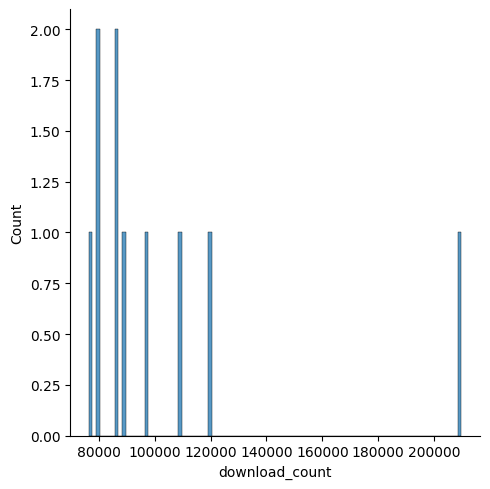

In [ ]:
# plotting the most popular authors
sns.displot(books_df.groupby('authors')['download_count'].sum().sort_values(ascending=False).head(10), bins=100)

In [ ]:
books_df['authors'] == 'Shakespeare William'

0        False
1         True
2        False
3        False
4        False
         ...  
37663    False
37664    False
37665    False
37666    False
37667    False
Name: authors, Length: 28306, dtype: bool

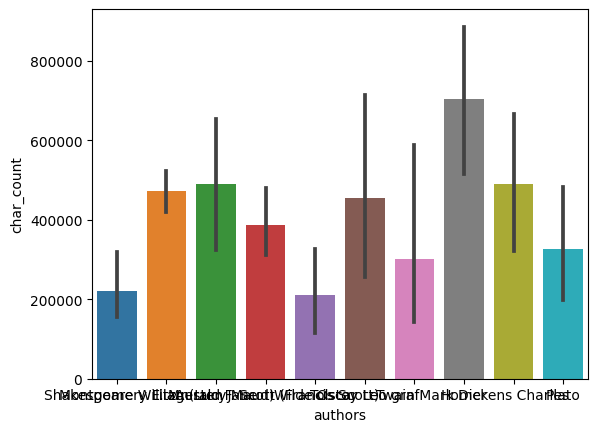

In [ ]:
most_famous = ['Shakespeare William',
'Montgomery L. M. (Lucy Maud)',
'Wilde Oscar',
'Dickens Charles',
'Fitzgerald F. Scott (Francis Scott)',
'Twain Mark',
'Plato',
'Homer',
'Tolstoy Leo graf',
'Austen Jane']

sns.barplot(x=books_df[books_df['authors'].isin(most_famous)]['authors'], y=books_df[books_df['authors'].isin(most_famous)]['char_count'])
plt.figsize=(20, 10)

In [ ]:
# Get the list of all books from the most famous authors
most_famous = ['Shakespeare William',
'Montgomery L. M. (Lucy Maud)',
'Wilde Oscar',
'Dickens Charles',
'Fitzgerald F. Scott (Francis Scott)',
'Twain Mark',
'Plato',
'Homer',
'Tolstoy Leo graf',
'Austen Jane']

books_df = books_df[books_df['authors'].isin(most_famous)]

In [ ]:
books_df['id'].tolist() # list of all books from the most famous authors 472

[1513,
 67979,
 100,
 1342,
 64317,
 174,
 2600,
 76,
 6130,
 1727,
 46,
 45,
 1497,
 1399,
 158,
 730,
 766,
 105,
 902,
 1524,
 121,
 1519,
 1600,
 1023,
 2199,
 141,
 921,
 3176,
 86,
 42671,
 55201,
 51,
 47,
 3177,
 1636,
 1515,
 1642,
 544,
 42704,
 1522,
 1112,
 23045,
 1041,
 1532,
 1531,
 102,
 14522,
 1750,
 1658,
 963,
 42078,
 3796,
 16452,
 1643,
 1672,
 19337,
 1526,
 1726,
 70,
 119,
 946,
 700,
 1635,
 689,
 821,
 2264,
 564,
 4078,
 1657,
 1508,
 1212,
 13726,
 31100,
 6695,
 1571,
 7100,
 46675,
 1213,
 1503,
 7176,
 1523,
 1687,
 1735,
 1534,
 27726,
 1777,
 4368,
 1539,
 21839,
 30120,
 2265,
 1591,
 1529,
 51355,
 1728,
 24875,
 20673,
 22382,
 4761,
 1738,
 26740,
 28803,
 1787,
 20686,
 7193,
 699,
 38690,
 1794,
 2267,
 91,
 1616,
 32325,
 24873,
 243,
 24874,
 37431,
 24878,
 1744,
 1540,
 68229,
 1129,
 25852,
 23344,
 1584,
 301,
 1580,
 30368,
 19987,
 1045,
 1103,
 1338,
 38616,
 43794,
 1579,
 1682,
 24876,
 4602,
 1535,
 1892,
 3059,
 2431,
 23043,
 24877

# Extract only the books of the 10 authors

In [ ]:
for book in books_df['id'].tolist():
    !cp /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/{book}.txt /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books_most_famous/{book}.txt

cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/1513.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/67979.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/20673.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/20686.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/20593.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/26301.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/22964.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/youwritelike/youwritelike/fetch-data/raw_data/books/22963.txt: No such file or directory
cp: /Users/nicolas/code/Nico404/y

In [ ]:
%cd ..
from pipe.chunks.chunkify import save_all_books_to_dataframe

/Users/nicolas/code/Nico404/youwritelike/youwritelike
['19987.txt', '1735.txt', '2572.txt', '1537.txt', '1523.txt', '921.txt', '5786.txt', '8473.txt', '699.txt', '100.txt', '9792.txt', '7556.txt', '1127.txt', '1133.txt', '50559.txt', '1682.txt', '1132.txt', '1126.txt', '5340.txt', '41119.txt', '8472.txt', '5787.txt', '1522.txt', '1536.txt', '14522.txt', '1520.txt', '1534.txt', '1508.txt', '5785.txt', '30127.txt', '1497.txt', '1130.txt', '1642.txt', '1124.txt', '25853.txt', '1118.txt', '301.txt', '25852.txt', '1119.txt', '1643.txt', '1125.txt', '1131.txt', '1657.txt', '5814.txt', '102.txt', '46675.txt', '8471.txt', '7193.txt', '5784.txt', '1509.txt', '1535.txt', '1521.txt', '32241.txt', '1086.txt', '16452.txt', '1045.txt', '1727.txt', '1041.txt', '1519.txt', '7154.txt', '1531.txt', '26740.txt', '7197.txt', '700.txt', '58329.txt', '8475.txt', '5810.txt', '68229.txt', '5838.txt', '1109.txt', '1135.txt', '1121.txt', '32325.txt', '23229.txt', '1120.txt', '1134.txt', '1108.txt', '5839.txt', 

In [ ]:
# /Users/nicolas/code/Nico404/youwritelike/youwritelike
import os 
os.path.abspath(os.getcwd())

'/Users/nicolas/code/Nico404/youwritelike/youwritelike'

In [ ]:
df = save_all_books_to_dataframe()
df

2452 chunks created
1096 chunks created
125 chunks created
507 chunks created
572 chunks created
444 chunks created
570 chunks created
384 chunks created
3620 chunks created
21257 chunks created
1696 chunks created
148 chunks created
721 chunks created
730 chunks created
3599 chunks created
299 chunks created
519 chunks created
580 chunks created
1592 chunks created
2121 chunks created
326 chunks created
587 chunks created
531 chunks created
483 chunks created
333 chunks created
519 chunks created
671 chunks created
559 chunks created
588 chunks created
2452 chunks created
4741 chunks created
696 chunks created
273 chunks created
711 chunks created
3221 chunks created
605 chunks created
324 chunks created
3233 chunks created
697 chunks created
556 chunks created
614 chunks created
747 chunks created
185 chunks created
723 chunks created
1227 chunks created
3568 chunks created
363 chunks created
220 chunks created
499 chunks created
444 chunks created
724 chunks created
674 chunks creat

,Author,Chunk
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,tenberg License included\nwith this eBook or o...
2,Twain Mark,MY AUTOBIOGRAPHY ***\n\n\n\n\nProduced by Bets...
3,Twain Mark,-I.[1]\n\nBY MARK TWAIN.\n\n\n PREFATORY N...
4,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
...,...,...
549047,Burnett Frances Hodgson,s for current donation\nmethods and addresses....
549048,Burnett Frances Hodgson,tenberg-tm electronic\nworks.\n\nProfessor Mic...
549049,Burnett Frances Hodgson,ks with only a loose network of volunteer supp...
549050,Burnett Frances Hodgson,ep eBooks in compliance with any particular pa...


In [ ]:
df['Author'].value_counts().head(20)

Author
Twain Mark                             89719
Shakespeare William                    75901
Dickens Charles                        60364
Tolstoy Leo graf                       42075
Homer                                  33244
Plato                                  26091
Austen Jane                            18595
Wilde Oscar                            16145
Montgomery L. M. (Lucy Maud)           15825
Dostoyevsky Fyodor                     11828
Zamiatin Evgenii Ivanovich              7421
Fitzgerald F. Scott (Francis Scott)     6061
Hemingway Ernest                        4822
Masefield John                          3620
Bradley A. C. (Andrew Cecil)            3431
Various                                 3416
Alcott Louisa May                       2936
Beyer H. Otley (Henry Otley)            2904
Eliot George                            2731
Carroll Lewis                           2490
Name: count, dtype: int64

In [ ]:
# filter df to keep only the most famous authors from most_famous list

df_short = df[df['Author'].isin(most_famous)]
df_short

NameError: name 'most_famous' is not defined

In [ ]:
# plot the distribution of the number of chunks per author
sns.displot(df_short['Author'].value_counts(), bins=100)